# Assignment 4: Data Wrangling and Classes in Python

## POP77001 Computer Programming for Social Scientists

## Before submission

- Do not use external libraries unless explicitly specified.
- Make sure that you can run all cells without errors.
- You can do it by clicking `Kernel`, `Restart & Run All` in the menu above.
- Make sure that you save the output by pressing Command+S / CTRL+S.
- Rename the file from `04_assignment.ipynb` to `04_assignment_studentnumber_firstname_lastname.ipynb`.
- Use Firefox browser for submitting your Jupyter notebook on Blackboard.

## Exercise 1: Data transformation

For exercises 1-3 we will be working with the [Titanic](https://github.com/pandas-dev/pandas/blob/master/doc/data/titanic.csv) dataset. It contains the list of passengers on Titanic with their sociodemographic characteristics, names and ticket details. First, create two new columns, called 'Last Name' and 'First Name' containing last name and first name of each passenger. Next, calculate the frequencies of passengers' last names. What were the 3 most common last names of passengers on the ship?

External libraries:
- `numpy`, `pandas`

In [7]:
# Data wrangling
import pandas as pd
import numpy as np
from collections import Counter

In [53]:
titanic = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Exercise 1:

# Your code goes here

# dropping null value columns to avoid errors
titanic.dropna(inplace = True)
# new data frame with split value columns

new = titanic["Name"].str.split(" ", n = 1, expand = True)

# making separate first name column from  new data frame
titanic["Last Name"]= new[0]

 # making separate last name column from new data frame 
titanic["First Name"]= new[1]

# Dropping old Name columns
titanic.drop(columns =["Name"], inplace = True)

# df display
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings,",Mrs. John Bradley (Florence Briggs Thayer)
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,"Futrelle,",Mrs. Jacques Heath (Lily May Peel)
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,"McCarthy,",Mr. Timothy J
10,11,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S,"Sandstrom,",Miss. Marguerite Rut
11,12,1,1,female,58.0,0,0,113783,26.5500,C103,S,"Bonnell,",Miss. Elizabeth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1,11751,52.5542,D35,S,"Beckwith,",Mrs. Richard Leonard (Sallie Monypeny)
872,873,0,1,male,33.0,0,0,695,5.0000,B51 B53 B55,S,"Carlsson,",Mr. Frans Olof
879,880,1,1,female,56.0,0,1,11767,83.1583,C50,C,"Potter,",Mrs. Thomas Jr (Lily Alexenia Wilson)
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,"Graham,",Miss. Margaret Edith


In [5]:
# count values of highest frequency 
count_n = titanic['Last Name'].value_counts()
count_n

Fortune,     4
Carter,      4
Graham,      3
Navratil,    3
Thayer,      3
            ..
Burns,       1
Partner,     1
Ball,        1
Young,       1
Behr,        1
Name: Last Name, Length: 140, dtype: int64

In [12]:
titanic['Last Name'].describe()

count          183
unique         140
top       Fortune,
freq             4
Name: Last Name, dtype: object

The most frequent last names are: Fortune, Carter, Graham, Navratil. 

## Exercise 2: Binning

When analyzing a continuous variable we often want to break it up into discrete categories (bins). For example, age might be considered as a categorical variable with discrete categories of '18-25', '26-35', etc. Implement a function that takes a dataframe, variable name and cutoff points (e.g. 18, 25, 35, etc.) as inputs and returns a dataframe with a single column, which is binned into desired categories. Run this function on the age column of Titanic dataset. What percentage of passengers falls into each of the age bins?

Tip: You can use `pandas.cut()` method internally.

Function specification:

Function takes 3 arguments:
- `df` - pandas data frame
- `col` - the name of column to be binned
- `cutoffs` - a sequence of cuttoff value to be used for binning

Function returns 1 object:
- `binned_df` - pandas data frame with the selected column binned according to the specification

External libraries:
- `numpy`, `pandas`

In [80]:
# Exercise 2:

# Your code goes here
from numpy import random
import pandas as pd


def binned_df(df, column, cutoffs): 
    """ Data transformation:  
    Takes a dataframe, variable name and cutoff points as inputs.
    Returns a dataframe with a single column, which is binned into desired categories.
    """  
    binned_df = pd.cut(df[column], cutoffs, bins=bins, labels=labels, 
                           right=False)
    
    return binned_df

In [81]:
help(binned_df)

Help on function binned_df in module __main__:

binned_df(df, column, cutoffs)
    Data transformation:  
    Takes a dataframe, variable name and cutoff points as inputs.
    Returns a dataframe with a single column, which is binned into desired categories.



In [61]:
#it runs but it doesn't get me the end goal to apply to the titanic
bins=[0, 18, 25, 35, 55, 75, 100]
age_bins = titanic['Age Group'] = pd.cut(titanic['Age'], bins)
age_bins



1      (35, 55]
3      (25, 35]
6      (35, 55]
10      (0, 18]
11     (55, 75]
         ...   
871    (35, 55]
872    (25, 35]
879    (55, 75]
887    (18, 25]
889    (25, 35]
Name: Age, Length: 183, dtype: category
Categories (6, interval[int64, right]): [(0, 18] < (18, 25] < (25, 35] < (35, 55] < (55, 75] < (75, 100]]

In [82]:
df1 = pd.DataFrame({'Age' : [random.randint(1, 99) for i in range(100)]})

def age_range(df):
    import pandas as pd
    df['Age']
    bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    labels=['0-9', '10-19', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
    df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

    binned_df = pd.DataFrame(df['AgeGroup'].groupby(df['AgeGroup']).count())
    return binned_df
print(age_range(df1))

          AgeGroup
AgeGroup          
0-9             12
10-19           10
20s             11
30s              7
40s             15
50s             16
60s              7
70s             11
80s              7
90s              4


In [54]:
bins = [0, 18, 25, 35, 55, 75, 100] 
titanic['Age Group'] = pd.cut(titanic.Age, bins)


In [83]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,binned,Age Group
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(35, 55]","(35, 55]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(25, 35]","(25, 35]"
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(35, 55]","(35, 55]"
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,"(0, 18]","(0, 18]"
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,"(55, 75]","(55, 75]"


In [84]:
titanic[['Age Group', 'Age']].groupby('Age Group', as_index=False).sum().sort_values(by = 'Age Group')

,Age Group,Age
0,"(0, 18]",239.92
1,"(18, 25]",651.00
2,"(25, 35]",1175.50
3,"(35, 55]",3165.00
4,"(55, 75]",1217.00
5,"(75, 100]",80.00


## Exercise 3: Pattern detection

Let us consider the column `Survived`, which contains a binary indicator of whether a given passenger survived the sinking of Titanic. What factors might explain the survival of some passengers but not others? How would you investigate these relationships? Describe your hypotheses and descriptive analyses that can help anwesring these questions. Perform the outlined descriptive analyses on the dataset.

External libraries:
- `numpy`, `pandas`

In [46]:
# Exercise 3:

# Your text and code go here

titanic = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv")

#Summary Statistics to describe the data. 
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
titanic.iloc[:,].value_counts(normalize = True)

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           0.005464
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           0.005464
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           0.005464
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           0.005464
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           0.005464
                                              

In [14]:
survived = titanic[['Survived', 'Sex']]
count_s = titanic[['Survived', 'Sex']].value_counts()
print(count_s)

Survived  Sex   
0         male      468
1         female    233
          male      109
0         female     81
dtype: int64


In [47]:
 # dropping null value columns to avoid errors
titanic.dropna(inplace = True)
# sorting the valyes 
t = titanic.sort_values(by=['Survived', 'Age', 'Sex'])
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
...,...,...,...,...,...,...,...,...,...,...,...,...
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S


In [33]:
titanic.Sex.value_counts(ascending=True,dropna=False)

female    88
male      95
Name: Sex, dtype: int64

In [26]:

titanic[['Sex', 'Survived']].groupby('Sex', as_index = False).sum().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,233
1,male,109


In [27]:

titanic[['Sex', 'Survived', 'Pclass', 'SibSp']].groupby('Sex', as_index = False).sum().sort_values(by = 'Survived', ascending = False)

,Sex,Survived,Pclass,SibSp
0,female,233,678,218
1,male,109,1379,248


In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
titanic.Survived.value_counts()

1    123
0     60
Name: Survived, dtype: int64

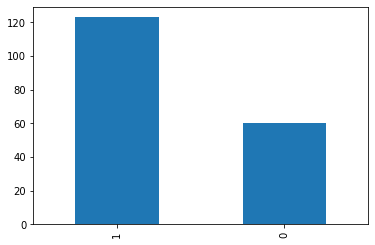

In [57]:
titanic.Survived.value_counts().plot(kind='bar'); 

In [1]:
import seaborn as sns

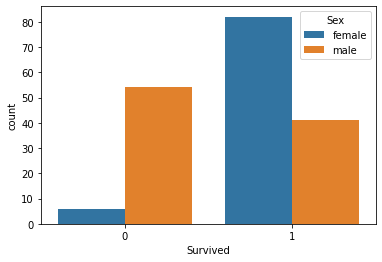

In [59]:
sns.countplot(x = 'Survived', data = titanic, hue='Sex'); 

While investigating the Survived column, I have taken into consideration 
different variables, first gender, and after trying to check if any other variable
influenced in the passenger survival rate, and it seems while using describe and filtering, it seems to have a correlation with survival rate for gender and class.  
The changes of survival were higher depending on the columns: Sex, Pclass, Ticket and SibSp. 


## Exercise 4: Methods

Given below is a simple class definition for class `Person`. At the moment the only method it has is its constructor, that takes person's first name and last name as inputs. Implement 2 additional methods for this class. One would return person's full name, another one would print it out when an object of this class is an argument to `print()` or `str()`. Create an instance of the modified class and call the first method and `print()` function on it.

Method specification:

Method 1 returns 1 object:
- `full_name` - person's full name provided as first name and last name separated by a whitespace

Method 2 returns `None` and prints out the object as:
- `full_name` - person's full name provided as first name and last name separated by a whitespace

External libraries:
- None

In [ ]:
class Person(object):
    def __init__(self, first_name, last_name):
        self.first_name = first_name
        self.last_name = last_name

In [11]:
# Exercise 4:

# Your text and code go here

# the code has no errors as a return, but it also is not being applied to anything. 
class Person_1(object):
    """ Returns person's full name, and print it out when the object of this class is an arument. 
    """
    def __init__(self, first_name, last_name):
        self.first_name = first_name
        self.last_name = last_name
        
    def full_name(self, arg):
        """Returns the full name."""
        
        self.first_name + ' - ' + self.last_name
    def __str__(self):
        """ print the function.""" 
        return ('Full name: ' + str(self.first_name + '-' + self.last_name)) 


In [12]:
help(Person_1)

Help on class Person_1 in module __main__:

class Person_1(builtins.object)
 |  Person_1(first_name, last_name)
 |  
 |  Returns person's full name, and print it out when the object of this class is an arument.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, first_name, last_name)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __str__(self)
 |      print the function.
 |  
 |  full_name(self, arg)
 |      Returns the full name.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [24]:
#New instance

class Person_2(object): 
    def full_name(self): 
        self.first_name = input("Enter first name")
        self.last_name = input("Enter last name")
        return self.first_name + self.last_name  
    def display (self): 
        super().full_name() 
        print("Person's full name:", self.first_name + self.last_name)
    def __str__(self):
        """ print the function.""" 
        return ('Full name: ' + str(self.first_name + '-' + self.last_name)) 

In [26]:
new_class = Person_2()

In [27]:
help(new_class)

Help on Person_2 in module __main__ object:

class Person_2(builtins.object)
 |  Methods defined here:
 |  
 |  __str__(self)
 |      print the function.
 |  
 |  display(self)
 |  
 |  full_name(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [30]:
new_class.display.(full_name)

SyntaxError: invalid syntax (619412139.py, line 1)

In [31]:
new_instance = new_class(print(full_name)

SyntaxError: unexpected EOF while parsing (3865431583.py, line 1)

## Exercise 5: Inheritance

Now create an `Employee` class, which would inherit from `Person`. Add a data attribute for salary. Implement 2 methods, where (1) retrieves employee's salary and (2) gives a salary raise as a percentage of the current salary. Test both functions on an instance of this class.  

Method specification:

Method 1 returns 1 object:
- `salary` - person's annual salary provided as an integer or float

Method 2 takes 1 argument:
- `percentage` - percentage by which employee's salary should be raised

External libraries:
- None

In [ ]:
# Exercise 5:

# Your text and code go here


In [60]:
class Employee(Person): 
    """ New data attribute with salary and raise of salary as percentage of the current wage. 
    """
    def __init__(self, employee): 
        self.id = id 
        self.name = name
        
    def retrive_salary(self, id, name, salary): 
        """ Retrive employee's salarys"""
        super().retrive_salary(id, name)
        self.salary = salary 
    
    def calculate_percentage(self): 
        """Percentage by which employee's salary should be raised"""
        return print(self.name, self.salary)
        

In [62]:
name = ('Ariana')
emp = Employee('Ariana')
per = Person ("Florin", 500)


In [63]:
print(isinstance(emp, Employee))

True


In [64]:
print(isinstance(per, Employee))

False
